# Lesson3_Data_Reclassification
This tutorial shows how to filter and classify data based on selection criteria. The data must first be created by running the notebook "Lesson_3.3_Geometric_Operations.ipynb".

In [1]:
# Import necessary modules
# Using PySAL, an open-source spatial analysis toolkit
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data created from 'Lesson3_Geometric_Operations' notebook

# Load the data as a GeoDataFrame
fileName = "Data/TravelTimes_to_5975375_RailwayStation.shp"
data = gpd.read_file(fileName)
data.head()

,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091,(POLYGON ((388000.0001354737 6669000.000042855...
1,0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091,"POLYGON ((386000.0001357752 6672250.000042347,..."
2,1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091,"POLYGON ((386250.000135732 6672000.000042383, ..."
3,1033,7,1033,5973738,653,9,9,653,9,9,5975375,653,9,27517366,Helsinki,Helsingfors,091,(POLYGON ((386250.0001357396 6671750.000042424...
4,1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091,"(POLYGON ((387000.000135593 6671750.000042402,..."


In [3]:
# Filter out rows with '-1' in travel time field indicating no data
data = data[data['pt_r_tt'] >=0]
data.head()

,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
1,0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091,"POLYGON ((386000.0001357752 6672250.000042347,..."
2,1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091,"POLYGON ((386250.000135732 6672000.000042383, ..."
3,1033,7,1033,5973738,653,9,9,653,9,9,5975375,653,9,27517366,Helsinki,Helsingfors,091,(POLYGON ((386250.0001357396 6671750.000042424...
4,1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091,"(POLYGON ((387000.000135593 6671750.000042402,..."
5,2621,9,2621,5965418,2023,12,13,2033,12,13,5975375,2027,29,27517366,Helsinki,Helsingfors,091,(POLYGON ((386750.0001356415 6671750.000042411...


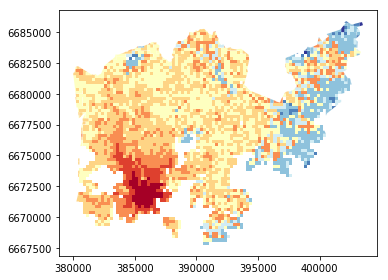

In [4]:
# Plot the travel time
data.plot(column="pt_r_tt", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0)
plt.tight_layout()

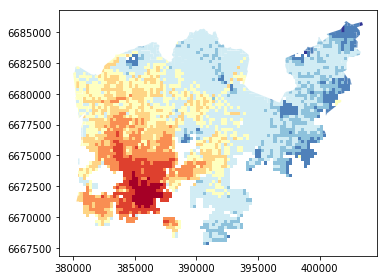

In [5]:
# Plot the walking distances
data.plot(column="walk_d", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0)
plt.tight_layout()

In [6]:
# Initialise a Jenks Natural Breaks classifier with 5 classes 
classifier = ps.Natural_Breaks.make(k=5)

# Apply to data
classifications = data[['pt_r_tt']].apply(classifier)

# Rename column and append to original data
classifications.columns = ['nb_pt_r_tt']  # rename column to something sensible
data = data.join(classifications)
classifications.head()

,nb_pt_r_tt
1,0
2,0
3,0
4,0
5,0


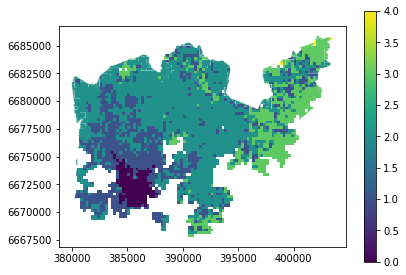

In [7]:
# Plot the classes
data.plot(column="nb_pt_r_tt", linewidth=0, legend=True);
plt.tight_layout()

## Custom classifier
Let’s create a function where we classify the geometries into two classes based on a given threshold -parameter. If the area of a polygon is lower than the threshold value (average size of the lake), the output column will get a value 0, if it is larger, it will get a value 1. This kind of classification is often called a binary classification.

In [8]:
# Define a binary classifier fucntion that operates on a single table row
def customClassifier2(row, col1, col2, thresh1, thresh2, outCol):
    
    # Want to find out about low travel times, away from city centre
    if row[col1] < thresh1 and row[col2] > thresh2:
        row[outCol] = 1
    else:
        row[outCol] = 0

    return row

In [9]:
# Apply classifier to data
data["Suitable_area"] = None
data = data.apply(customClassifier2, col1='pt_r_tt', col2='walk_d', 
                thresh1=30, thresh2=5000, outCol="Suitable_area", axis=1)
data.head()

,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt,Suitable_area
1,0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091,"POLYGON ((386000.0001357752 6672250.000042347,...",0,0
2,1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091,"POLYGON ((386250.000135732 6672000.000042383, ...",0,0
3,1033,7,1033,5973738,653,9,9,653,9,9,5975375,653,9,27517366,Helsinki,Helsingfors,091,(POLYGON ((386250.0001357396 6671750.000042424...,0,0
4,1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091,"(POLYGON ((387000.000135593 6671750.000042402,...",0,0
5,2621,9,2621,5965418,2023,12,13,2033,12,13,5975375,2027,29,27517366,Helsinki,Helsingfors,091,(POLYGON ((386750.0001356415 6671750.000042411...,0,0


In [10]:
# How many results?
data['Suitable_area'].value_counts()

0    46
1     1
Name: Suitable_area, dtype: int64

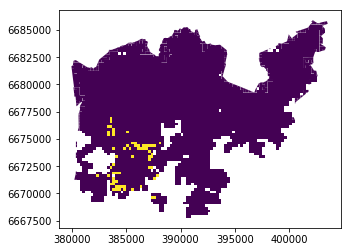

In [11]:
# Plot the suitable areas
data.plot(column="Suitable_area", linewidth=0);